In [1]:
import matplotlib.pyplot as plt
import numpy as np
import struct

In [ ]:
import cv2  #opencv

In [2]:
def readOVF(plik):
    f=open(plik,"rb")
    byte=f.read()
    ii=0
    t4=b''
    t8=b''
    while (t8!=b'@\xdew\x83!\x12\xdcB') & (t4!=b'8\xb4\x96I'):
        t8=byte[ii:(ii+8)]
        t4=byte[ii:(ii+4)]
        ii=ii+1
    words=byte[0:ii].decode().replace('\n',' ').split(' ')
    xns="xnodes:"
    yns="ynodes:"
    zns="znodes:"
    bins="Binary"
    xnn=[s+1 for s,v in enumerate(words) if v==xns]
    ynn=[s+1 for s,v in enumerate(words) if v==yns]
    znn=[s+1 for s,v in enumerate(words) if v==zns]
    binn=[s+1 for s,v in enumerate(words) if v==bins]
    xn=int(words[xnn[0]])
    yn=int(words[ynn[0]])
    zn=int(words[znn[0]])
    bn=int(words[binn[0]])
    if bn==4:
        dat=struct.unpack('f'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])
    if bn==8:
        dat=struct.unpack('d'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])   
    dat3=np.array(dat).reshape(zn,yn,xn,3)
    ms=np.sqrt(pow(dat3[0,0,0,0],2)+pow(dat3[0,0,0,1],2)+pow(dat3[0,0,0,2],2))
    return dat3/ms



In [173]:
tab=readOVF("mumax-2021-03-30_17h17.out/m000000.ovf")

In [174]:
np.shape(tab)

(1, 1024, 1024, 3)

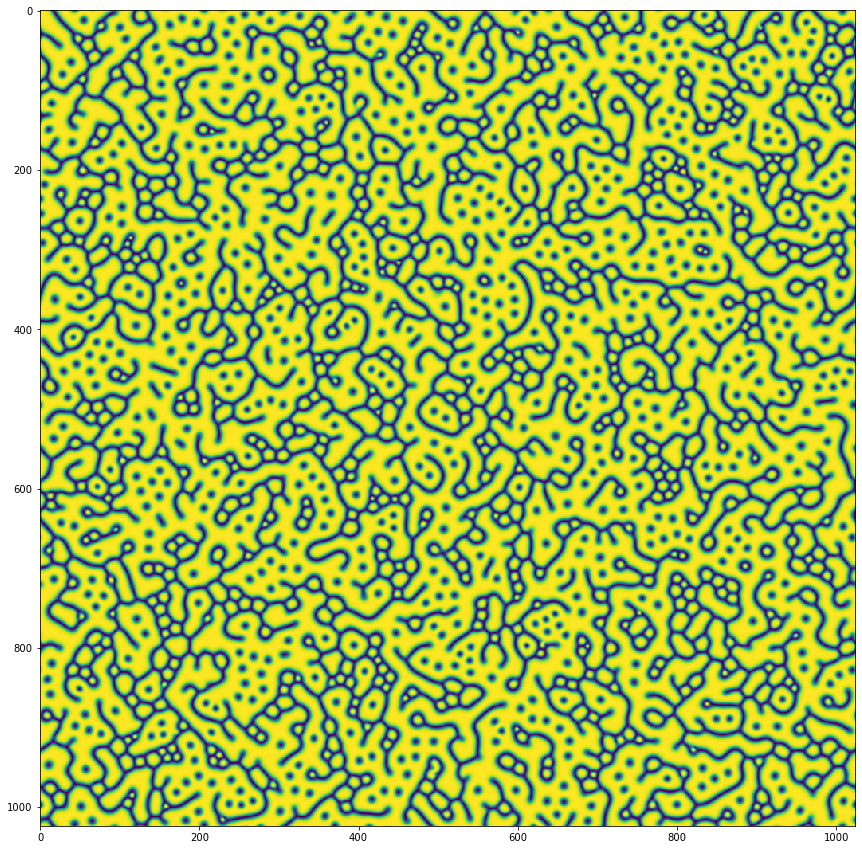

In [178]:
plt.figure(figsize=(15,15))
plt.imshow(tab[0,:,:,2])

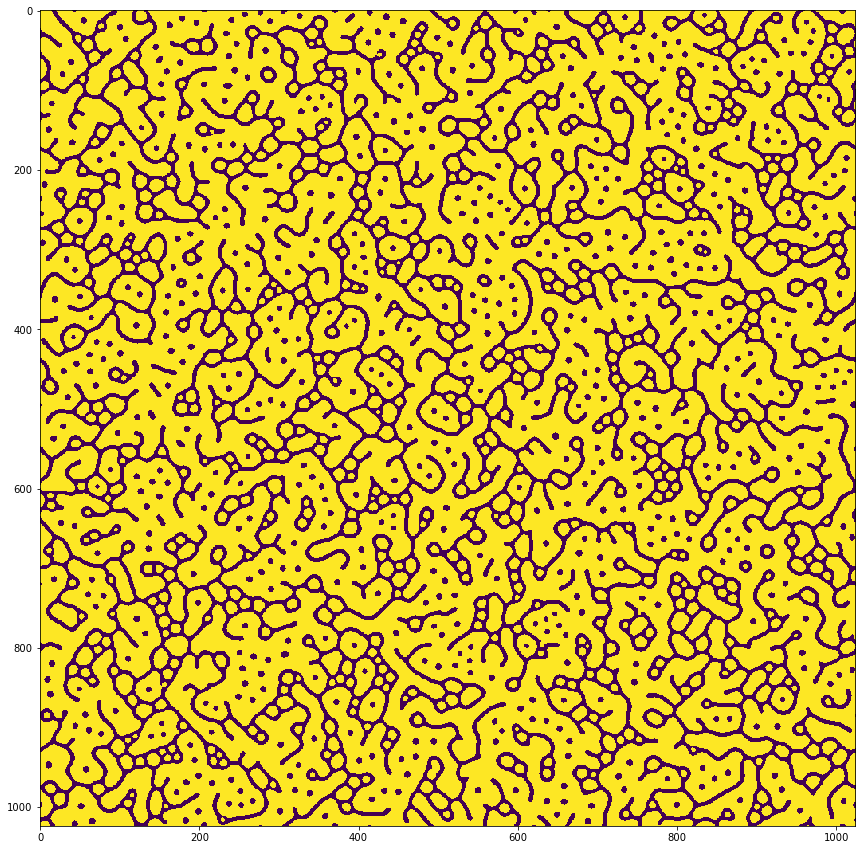

In [187]:
tab2=np.round((tab[0,:,:,2]/2+1/2))
plt.figure(figsize=(15,15))
plt.imshow(tab2)

In [354]:
im = tab2[:]-2
h,w = im.shape
mask = np.zeros((h+2,w+2),np.uint8)
# floodflags = 4
# floodflags |= cv2.FLOODFILL_MASK_ONLY
# floodflags |= (255 << 8)

In [355]:
k=0
for y in range(h):
    for x in range(w):
        if im[y,x]==-2:
            seed=(x,y)
            num,im,mask,rect = cv2.floodFill(np.float32(im), mask, seed,k, 0,0)
            k+=1

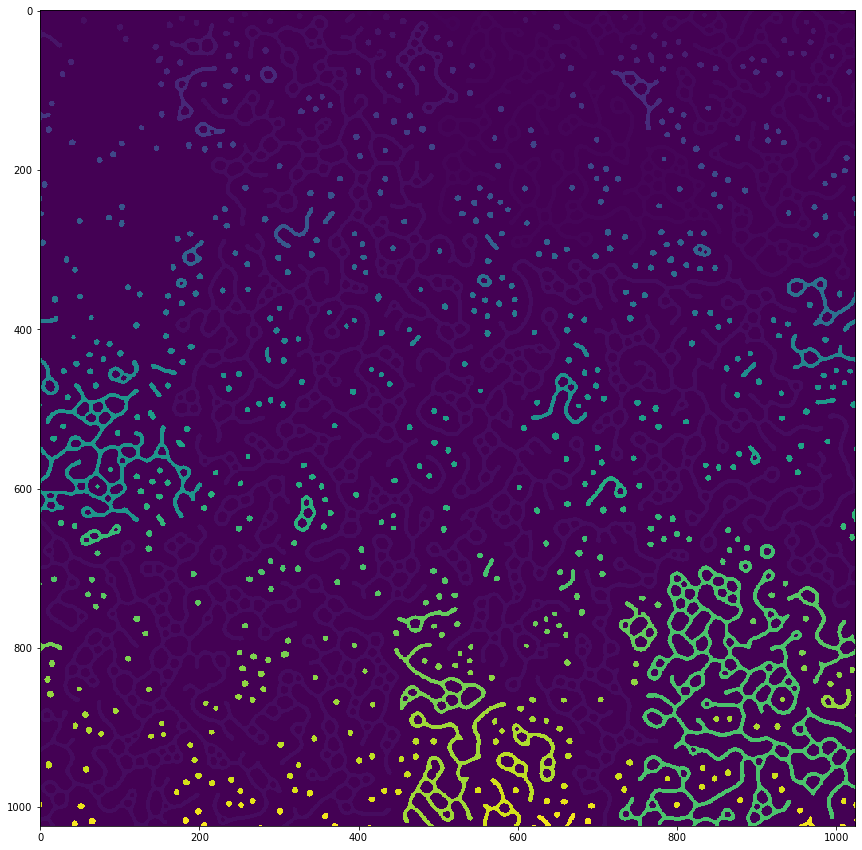

In [356]:
plt.figure(figsize=(15,15))
plt.imshow(im)

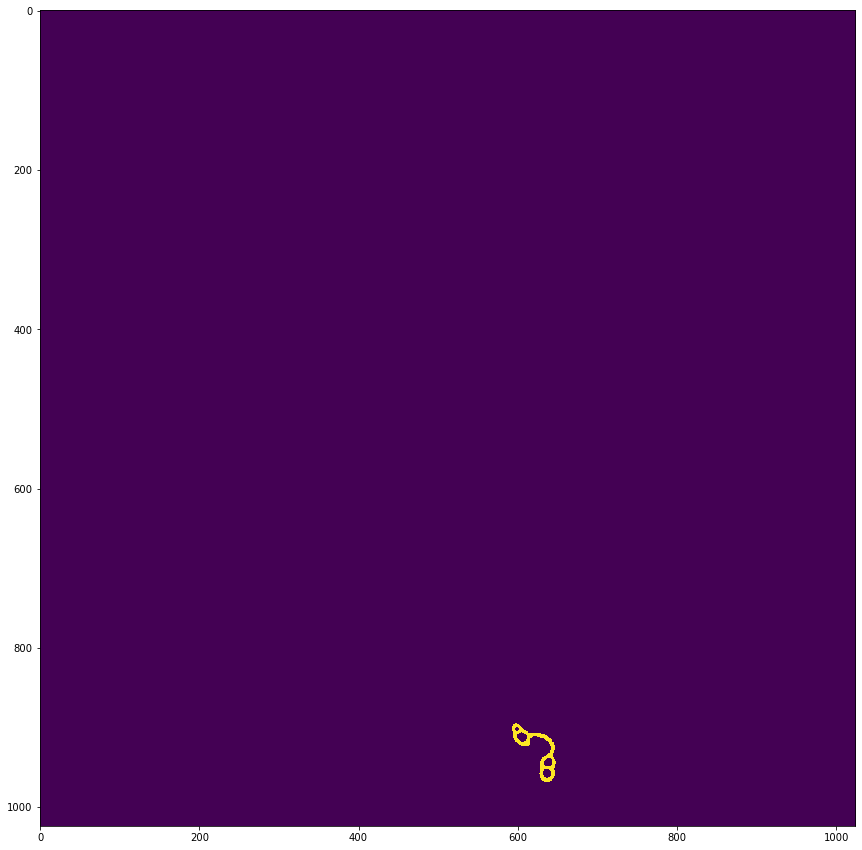

In [358]:
plt.figure(figsize=(15,15))
plt.imshow(im==600)

In [359]:
np.max(im)

685.0

In [360]:
vtab=np.zeros(int(np.max(im)+1),dtype=int)
xtab=np.zeros(int(np.max(im)+1),dtype=float)
ytab=np.zeros(int(np.max(im)+1),dtype=float)
r2tab=np.zeros(int(np.max(im)+1),dtype=float)

In [363]:
for y in range(h):
    for x in range(w):
        t=int(im[y,x])
        if t>=0:
            vtab[t]+=1
            xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
            ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
            r2=(x-xtab[t])**2+(y-ytab[t])**2
            if r2>r2tab[t]:
                r2tab[t]=r2

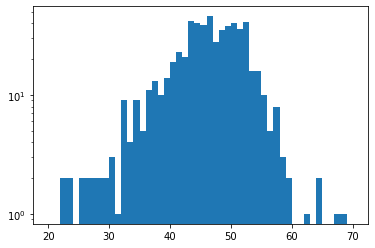

In [365]:
plt.hist(vtab,bins=50,range=(20,70));
plt.yscale("log")

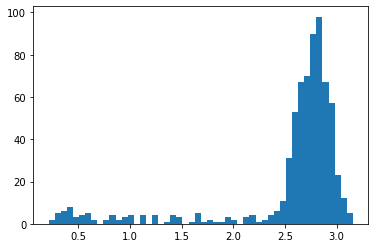

In [304]:
plt.hist(vtab/r2tab,bins=50);

In [366]:
np.max(vtab/r2tab)

3.156299610333411

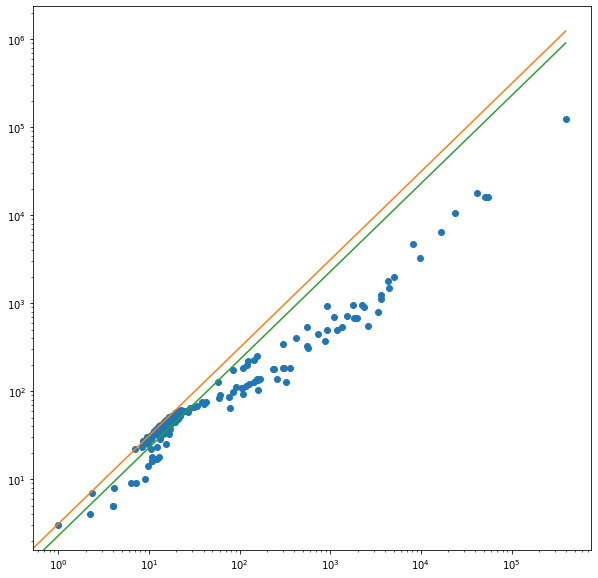

In [348]:
plt.figure(figsize=(10,10))
plt.plot(r2tab,vtab,"o")
plt.plot([0,np.max(r2tab)],[0,max(r2tab)*3.14])
plt.plot([0,np.max(r2tab)],[0,max(r2tab)*2.3])
plt.xscale("log")
plt.yscale("log")

In [376]:
kolo= vtab/r2tab>2

In [377]:
kolomap=np.zeros(np.shape(im))
for y in range(h):
    for x in range(w):
        t=int(im[y,x])
        if t>=0:
            kolomap[y,x]=kolo[t]

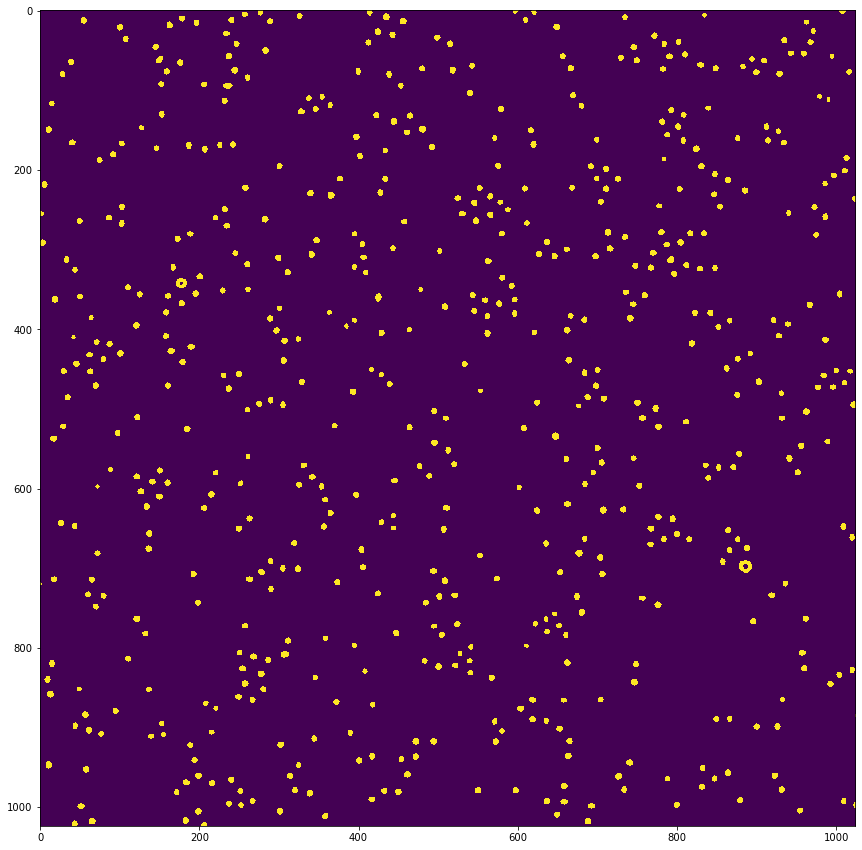

In [378]:
plt.figure(figsize=(15,15))
plt.imshow(kolomap)